# Day_057

### 練習時間
#### 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

In [2]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
X = iris.data
y = iris.target
print(df_iris.shape, np.bincount(y))
df_iris.head()

(150, 4) [50 50 50]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# 秀出資料欄位的類型與數量
dtype_df = df_iris.dtypes.reset_index() # 重置 index 值
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,float64,4


載入相關套件，並執行 hierarchical clustering 實驗

AgglomerativeClustering (

            affinity = 'euclidean', compute_full_tree = 'auto',
            connectivity = None, linkage = 'ward', memory = None, n_clusters = 2,
            pooling_func = <function mean at 0x0000018E27B02BF8> )
資料建模並視覺化結果

In [4]:
def plot_3Dcluster(X, y, columns, labels, titles, fignum):
    fig = plt.figure(figsize = (8, 6))
    ax = Axes3D(fig, rect = [0, 0, .95, 1])
    ax.scatter(X[:, 1], X[:, 2], X[:, 3], c = columns.astype(np.float), edgecolor='k')
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    ax.view_init(elev = 15, azim = 225) # elev 垂直旋轉; azim 水平旋轉    

In [5]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters = 3, linkage = "ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters = 3, linkage = "complete")),
              ('hc_average', AgglomerativeClustering(n_clusters = 3, linkage = "average"))]

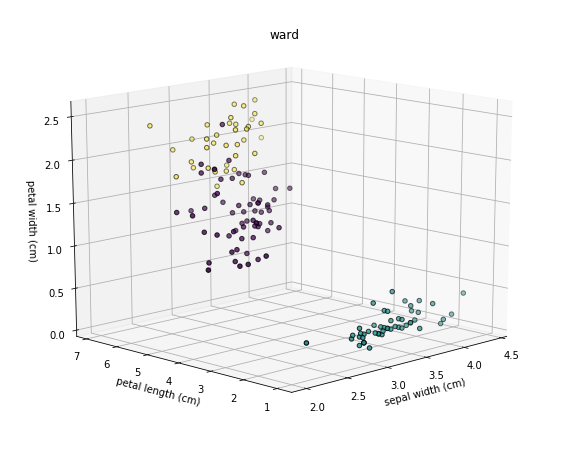

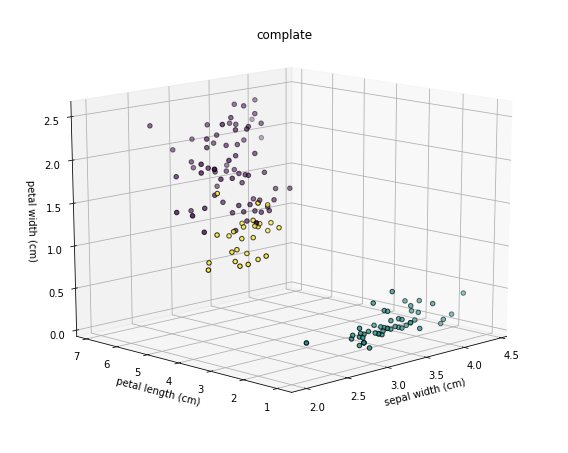

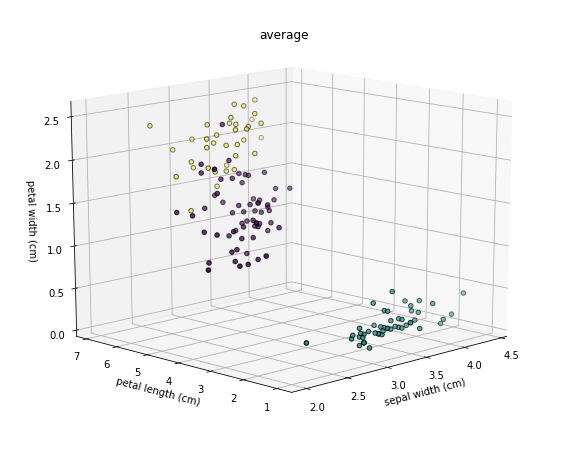

In [6]:
fignum = 1
titles = ['ward', 'complate', 'average', 'Ground Truth']
for cluster, agg in estimators:
    agg.fit(X)
    columns = agg.labels_
    labels = iris.feature_names[1:]    
    plot_3Dcluster(X, y, columns, labels, titles, fignum) 
    fignum = fignum + 1

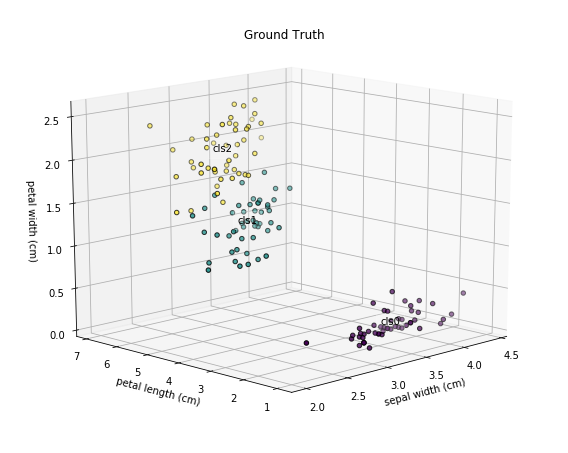

In [7]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig, rect = [0, 0, .95, 1])
ax.scatter(X[:, 1], X[:, 2], X[:, 3], c = y, edgecolor='k')
for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 1].mean(),
              X[y == label, 2].mean(),
              X[y == label, 3].mean(), name,
              horizontalalignment = 'center',
              bbox = dict(alpha=.2, edgecolor='w', facecolor='w'))
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_zlabel(labels[2])
ax.set_title(titles[fignum - 1])
ax.dist = 12
ax.view_init(elev = 15, azim = 225) # elev 垂直旋轉; azim 水平旋轉    